# Sección 19: Modelos Exponenciales en Cálculo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, diff, solve, Eq, sqrt, pi, exp, sin, log, limit, oo, lambdify

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Decaimiento de Ventas

### 1.1 Modelo exponencial de decaimiento
**Ecuación clave**:
$F = Pe^{-rt}$

Donde:
- $P$ = Ventas iniciales
- $r$ = Tasa de decaimiento
- $t$ = Tiempo
- $F$ = Ventas después del tiempo $t$

=== Decaimiento de Ventas ===
Tasa de decaimiento anual: 0.2686 (26.9%)


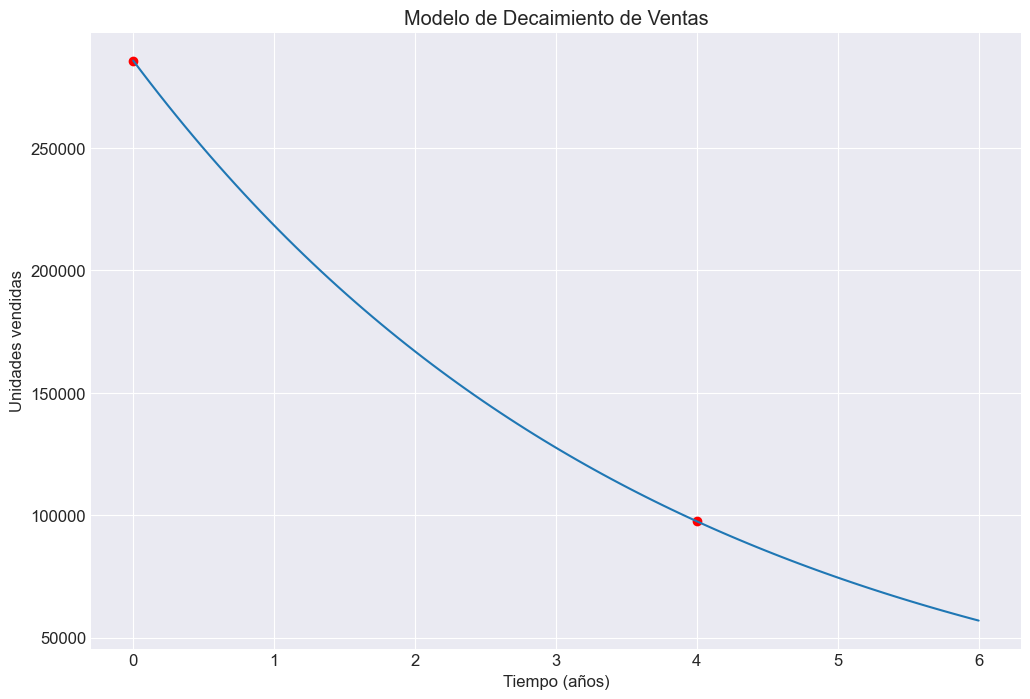

In [2]:
def sales_decay():
    t = symbols('t')
    P = 285674  # Ventas iniciales
    F = 97546   # Ventas finales
    time = 4    # Años

    # Calcular la tasa de decaimiento r usando logaritmo natural
    r_value = -log(F / P) / time # type: ignore

    print("=== Decaimiento de Ventas ===")
    r_value_float = float(r_value.evalf())
    print(f"Tasa de decaimiento anual: {r_value_float:.4f} ({r_value_float*100:.1f}%)")

    # Gráfico del modelo
    F_func = lambdify(t, P * exp(-r_value * t), 'numpy') # type: ignore
    t_vals = np.linspace(0, 6, 100)

    plt.figure()
    plt.plot(t_vals, F_func(t_vals))
    plt.scatter([0, time], [P, F], color='red')
    plt.title('Modelo de Decaimiento de Ventas')
    plt.xlabel('Tiempo (años)')
    plt.ylabel('Unidades vendidas')
    plt.grid(True)
    plt.show()

sales_decay()

## 2. Vida Media (Half-Life)

### 2.1 Modelo de decaimiento radioactivo
**Ecuaciones clave**:
- Decaimiento general: $y = Ce^{-kt}$
- Vida media: $\frac{C}{2} = Ce^{-kt_{1/2}}$


=== Vida Media ===
Constante de decaimiento (k): 0.2310
Cantidad después de 10 días: 119.06 mg


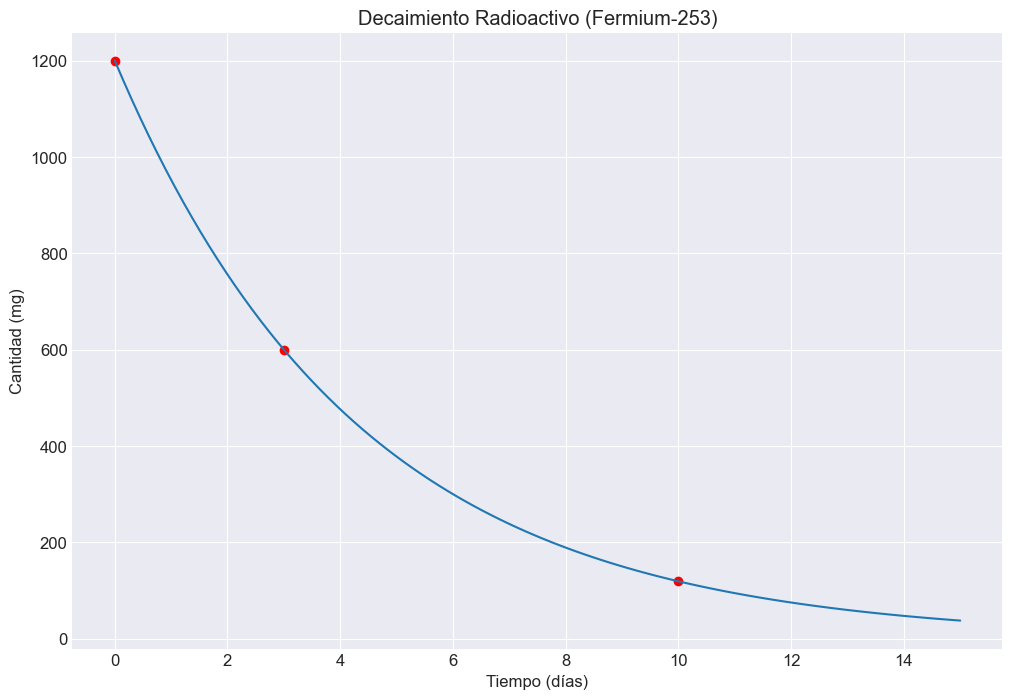

In [3]:
def half_life():
    t = symbols('t')
    k = symbols('k')
    C = 1200  # mg iniciales
    half_life = 3  # días
    total_time = 10  # días
    
    # Calcular constante de decaimiento k
    half_life_eq = Eq(C/2, C * exp(-k * half_life)) # type: ignore
    k_solution = solve(half_life_eq, k)[0]
    
    # Cantidad después de 10 días
    y_10 = C * exp(-k_solution * total_time) # type: ignore
    
    print("\n=== Vida Media ===")
    print(f"Constante de decaimiento (k): {k_solution.evalf():.4f}")
    print(f"Cantidad después de 10 días: {y_10.evalf():.2f} mg")
    
    # Gráfico del decaimiento
    k_value = k_solution.evalf()
    y_func = lambdify(t, C * exp(-k_value * t), 'numpy') # type: ignore
    t_vals = np.linspace(0, 15, 100)
    
    plt.figure()
    plt.plot(t_vals, y_func(t_vals))
    plt.scatter([0, half_life, total_time], [C, C/2, y_10.evalf()], color='red')
    plt.title('Decaimiento Radioactivo (Fermium-253)')
    plt.xlabel('Tiempo (días)')
    plt.ylabel('Cantidad (mg)')
    plt.grid(True)
    plt.show()

half_life()


## 3. Ley de Enfriamiento de Newton

### 3.1 Modelo de enfriamiento
**Ecuación clave**:
$T(t) = T_a + (T_0 - T_a)e^{-kt}$

Donde:
- $T_0$ = Temperatura inicial
- $T_a$ = Temperatura ambiente
- $k$ = Constante de enfriamiento


=== Ley de Enfriamiento ===
Constante de enfriamiento (k): 0.005263
Tiempo para alcanzar 90°C: 26.43 minutos


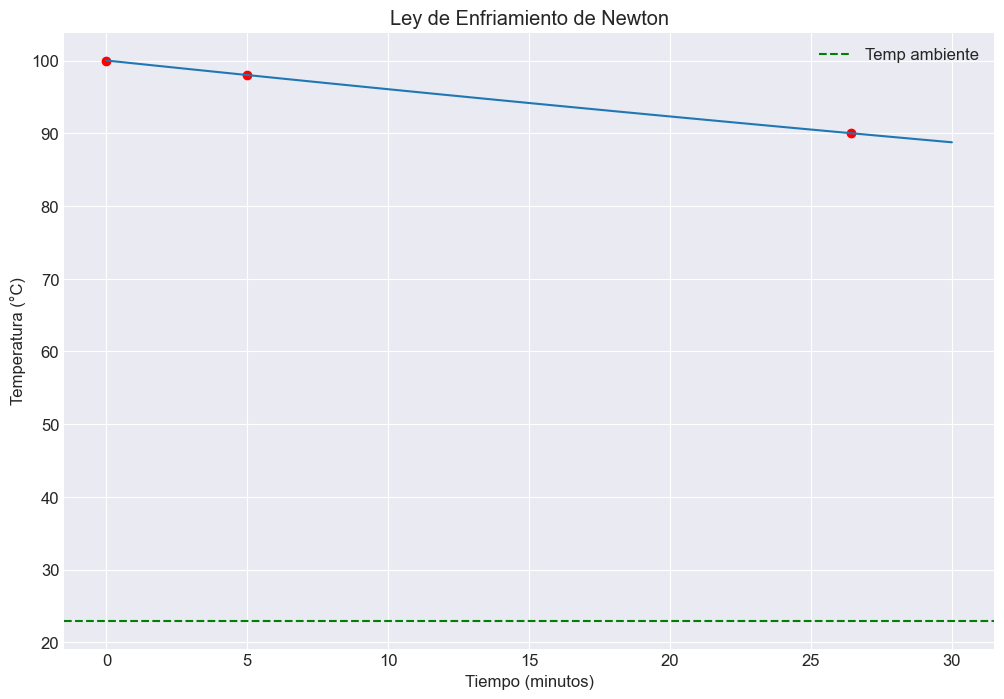

In [4]:
def newtons_cooling():
    t = symbols('t')
    k = symbols('k')
    T0 = 100  # °C
    Ta = 23   # °C ambiente
    T5 = 98   # °C a los 5 minutos
    target = 90  # °C objetivo

    # Calcular constante k
    cooling_eq = Eq(T5, Ta + (T0 - Ta) * exp(-k * 5)) # type: ignore
    k_solution = solve(cooling_eq, k)[0]

    # Tiempo para alcanzar 90°C
    time_eq = Eq(target, Ta + (T0 - Ta) * exp(-k_solution * t)) # type: ignore
    time_solution = solve(time_eq, t)[0]

    print("\n=== Ley de Enfriamiento ===")
    print(f"Constante de enfriamiento (k): {k_solution.evalf():.6f}")
    print(f"Tiempo para alcanzar 90°C: {time_solution.evalf():.2f} minutos")

    # Gráfico del enfriamiento
    k_value = k_solution.evalf()
    T_func = lambdify(t, Ta + (T0 - Ta) * exp(-k_value * t), 'numpy') # type: ignore
    t_vals = np.linspace(0, 30, 100)

    plt.figure()
    plt.plot(t_vals, T_func(t_vals))
    plt.scatter([0, 5, time_solution.evalf()], [T0, T5, target], color='red')
    plt.axhline(y=Ta, color='green', linestyle='--', label='Temp ambiente')
    plt.title('Ley de Enfriamiento de Newton')
    plt.xlabel('Tiempo (minutos)')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()

newtons_cooling()

## 4. Interés Compuesto

### 4.1 Modelos de crecimiento exponencial
**Ecuaciones clave**:
- Continuo: $A = Pe^{rt}$
- Discreto: $A = P(1 + \frac{r}{n})^{nt}$


=== Interés Compuesto ===
Valor después de 3 años (continuo): $2188.35
Valor después de 3 años (trimestral): $2187.61


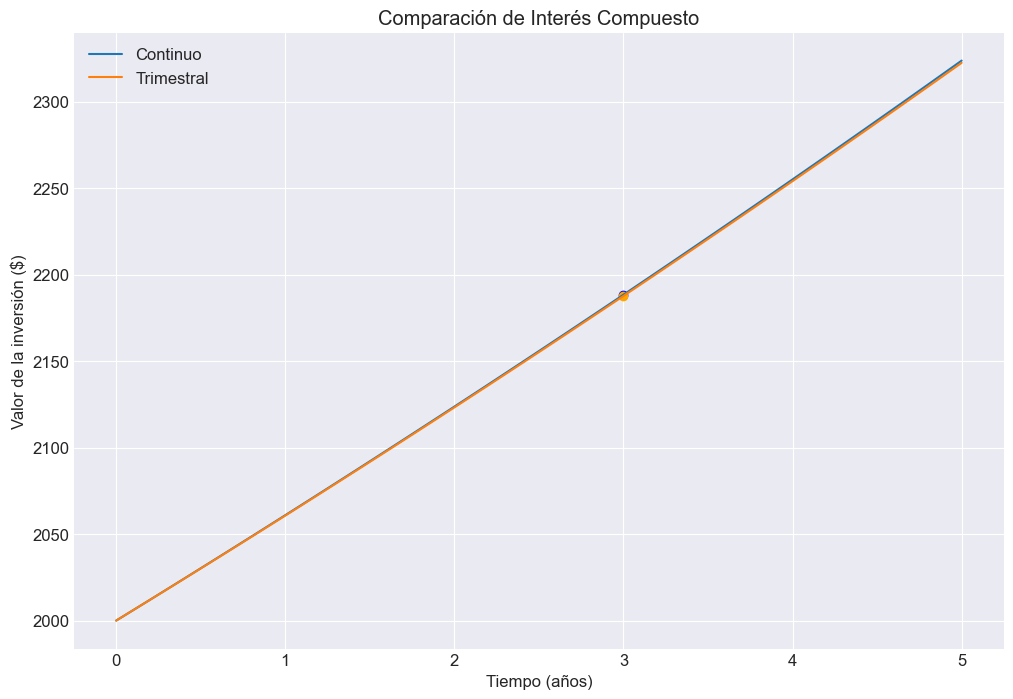

In [5]:
def compound_interest():
    t = symbols('t')
    P = 2000  # Inversión inicial
    r = 0.03  # Tasa anual
    time = 3  # Años
    
    # Cálculo continuo
    A_cont = P * exp(r * time) # type: ignore
    
    # Cálculo discreto (trimestral, n=4)
    n = 4
    A_disc = P * (1 + r/n)**(n * time)
    
    print("\n=== Interés Compuesto ===")
    print(f"Valor después de 3 años (continuo): ${A_cont.evalf():.2f}")
    print(f"Valor después de 3 años (trimestral): ${A_disc:.2f}")
    
    # Gráfico comparativo
    t_vals = np.linspace(0, 5, 100)
    A_cont_func = lambdify(t, P * exp(r * t), 'numpy') # type: ignore
    A_disc_func = lambdify(t, P * (1 + r/n)**(n * t), 'numpy')
    
    plt.figure()
    plt.plot(t_vals, A_cont_func(t_vals), label='Continuo')
    plt.plot(t_vals, A_disc_func(t_vals), label='Trimestral')
    plt.scatter([time], [A_cont.evalf()], color='blue')
    plt.scatter([time], [A_disc], color='orange')
    plt.title('Comparación de Interés Compuesto')
    plt.xlabel('Tiempo (años)')
    plt.ylabel('Valor de la inversión ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

compound_interest()

## 5. Resumen Teórico

| **Concepto**               | **Fórmulas/Relaciones**                     | **Interpretación**                     |
|----------------------------|---------------------------------------------|----------------------------------------|
| **Decaimiento de ventas**  | $F = Pe^{-rt}$                             | Ventas en función del tiempo           |
| **Vida media**             | $y = Ce^{-kt}$                             | Cantidad de sustancia restante         |
|                            | $\frac{C}{2} = Ce^{-kt_{1/2}}$             | Definición de vida media               |
| **Enfriamiento de Newton** | $T(t) = T_a + (T_0 - T_a)e^{-kt}$          | Temperatura en función del tiempo      |
| **Interés compuesto**      | $A = Pe^{rt}$ (continuo)                   | Crecimiento exponencial continuo       |
|                            | $A = P(1 + \frac{r}{n})^{nt}$ (discreto)   | Crecimiento con capitalización periódica |
